In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Input, Dense, LSTM, Dropout
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from random import randint
import argparse


Using TensorFlow backend.


In [2]:
data = pd.read_excel('final_version.xlsx', header=None)
data = data.to_numpy()[1:]


In [3]:
idx = 0



In [4]:
X, Y = [], []


In [5]:
while True:
    if idx+15 >= len(data):
        break
    X.append(data[idx:idx+15])
    Y.append(data[idx+15])
    idx += 1
X = np.array(X)
Y = np.array(Y)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
X_train = np.array(X_train)[:, :, [1, 3, 4]]
Y_train = np.array(Y_train)[:, -1].reshape(-1, 1)
X_test = np.array(X_test)[:, :, [1, 3, 4]]
Y_test = np.array(Y_test)[:, -1].reshape(-1, 1)

In [8]:
np.shape(X_train)

(17520, 15, 3)

In [9]:
X_nonzero = []
Y_nonzero = []
for i, y in enumerate(Y_train):
    if y[-1] != 0.0:
        X_nonzero.append(X_train[i])
        Y_nonzero.append(y)

In [10]:
X_train = np.concatenate((X_train, X_nonzero, X_nonzero, X_nonzero))
Y_train = np.concatenate((Y_train, Y_nonzero, Y_nonzero, Y_nonzero))

In [11]:
def build_model(input_shape):
    x = Input(shape=input_shape)

    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(x)
    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(h)
    # h = LSTM(20, activation='tanh', kernel_initializer='he_normal')(h)
    h = LSTM(80, activation='tanh',
             kernel_initializer='he_normal')(x)  # 128

    y = Dense(1, activation='relu')(h)
    return Model(inputs=x, outputs=y)

In [12]:
model = build_model((15, 3))
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 15, 3)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                26880     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mse', optimizer=RMSprop(), metrics=['mae'])



In [14]:
es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=5000)
mc = ModelCheckpoint('best_model.h5', monitor='val_mae', mode='min', save_best_only=True)



In [15]:
hist = model.fit(
    X_train, Y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=5000,
    verbose=2,
    callbacks=[es, mc])



Train on 26553 samples, validate on 6639 samples
Epoch 1/5000
 - 3s - loss: 382.3718 - mae: 7.6117 - val_loss: 624.5757 - val_mae: 11.3700
Epoch 2/5000
 - 4s - loss: 350.9059 - mae: 8.3253 - val_loss: 588.7176 - val_mae: 11.4800
Epoch 3/5000
 - 4s - loss: 339.9278 - mae: 8.4330 - val_loss: 571.2449 - val_mae: 11.5695
Epoch 4/5000
 - 3s - loss: 334.0077 - mae: 8.4547 - val_loss: 562.7796 - val_mae: 11.5794
Epoch 5/5000
 - 3s - loss: 329.5563 - mae: 8.4601 - val_loss: 552.9295 - val_mae: 11.6248
Epoch 6/5000
 - 3s - loss: 326.4845 - mae: 8.4549 - val_loss: 546.7275 - val_mae: 11.6494
Epoch 7/5000
 - 3s - loss: 324.2758 - mae: 8.4405 - val_loss: 548.8606 - val_mae: 11.5845
Epoch 8/5000
 - 3s - loss: 322.5515 - mae: 8.3898 - val_loss: 540.4603 - val_mae: 11.6167
Epoch 9/5000
 - 3s - loss: 321.2643 - mae: 8.3686 - val_loss: 539.8473 - val_mae: 11.5954
Epoch 10/5000
 - 3s - loss: 319.8444 - mae: 8.3329 - val_loss: 537.0721 - val_mae: 11.5910
Epoch 11/5000
 - 3s - loss: 318.6384 - mae: 8.3398

 - 3s - loss: 147.1813 - mae: 5.1245 - val_loss: 237.2048 - val_mae: 7.5192
Epoch 92/5000
 - 3s - loss: 144.5038 - mae: 5.0682 - val_loss: 248.2064 - val_mae: 7.6857
Epoch 93/5000
 - 3s - loss: 142.3742 - mae: 5.0305 - val_loss: 239.8859 - val_mae: 7.5316
Epoch 94/5000
 - 3s - loss: 142.0226 - mae: 5.0220 - val_loss: 228.4340 - val_mae: 7.4633
Epoch 95/5000
 - 3s - loss: 138.4649 - mae: 4.9628 - val_loss: 245.9077 - val_mae: 8.0472
Epoch 96/5000
 - 3s - loss: 137.1205 - mae: 4.9191 - val_loss: 297.2580 - val_mae: 8.2088
Epoch 97/5000
 - 3s - loss: 134.4370 - mae: 4.8787 - val_loss: 240.7241 - val_mae: 7.6276
Epoch 98/5000
 - 3s - loss: 133.8730 - mae: 4.8507 - val_loss: 226.4174 - val_mae: 7.3380
Epoch 99/5000
 - 3s - loss: 131.9649 - mae: 4.7979 - val_loss: 218.3545 - val_mae: 7.1902
Epoch 100/5000
 - 3s - loss: 130.0108 - mae: 4.7722 - val_loss: 229.1118 - val_mae: 7.3486
Epoch 101/5000
 - 3s - loss: 127.7816 - mae: 4.7269 - val_loss: 219.9667 - val_mae: 7.3937
Epoch 102/5000
 - 4s -

Epoch 182/5000
 - 5s - loss: 52.2743 - mae: 3.0992 - val_loss: 89.8958 - val_mae: 5.0088
Epoch 183/5000
 - 5s - loss: 52.0691 - mae: 3.1182 - val_loss: 87.6285 - val_mae: 4.9468
Epoch 184/5000
 - 5s - loss: 51.7468 - mae: 3.1043 - val_loss: 101.0898 - val_mae: 5.3369
Epoch 185/5000
 - 5s - loss: 51.2355 - mae: 3.0637 - val_loss: 93.6248 - val_mae: 5.1505
Epoch 186/5000
 - 5s - loss: 50.9424 - mae: 3.0493 - val_loss: 87.5387 - val_mae: 4.8974
Epoch 187/5000
 - 5s - loss: 51.3480 - mae: 3.0649 - val_loss: 108.0870 - val_mae: 5.4677
Epoch 188/5000
 - 5s - loss: 50.3503 - mae: 3.0531 - val_loss: 82.2897 - val_mae: 4.7767
Epoch 189/5000
 - 5s - loss: 50.2194 - mae: 3.0504 - val_loss: 92.8804 - val_mae: 5.1785
Epoch 190/5000
 - 5s - loss: 49.1321 - mae: 3.0044 - val_loss: 81.2065 - val_mae: 4.7317
Epoch 191/5000
 - 5s - loss: 51.0673 - mae: 3.0502 - val_loss: 87.8310 - val_mae: 4.9565
Epoch 192/5000
 - 5s - loss: 49.0570 - mae: 2.9849 - val_loss: 91.2562 - val_mae: 5.0000
Epoch 193/5000
 - 5

Epoch 274/5000
 - 5s - loss: 31.1290 - mae: 2.4201 - val_loss: 53.1078 - val_mae: 3.9724
Epoch 275/5000
 - 5s - loss: 31.6185 - mae: 2.4230 - val_loss: 71.1676 - val_mae: 4.5738
Epoch 276/5000
 - 5s - loss: 31.4829 - mae: 2.4456 - val_loss: 56.0066 - val_mae: 4.0961
Epoch 277/5000
 - 5s - loss: 31.0375 - mae: 2.4161 - val_loss: 65.8021 - val_mae: 4.3373
Epoch 278/5000
 - 5s - loss: 30.6566 - mae: 2.3809 - val_loss: 61.0687 - val_mae: 4.3162
Epoch 279/5000
 - 5s - loss: 30.1609 - mae: 2.3725 - val_loss: 54.3197 - val_mae: 4.0581
Epoch 280/5000
 - 5s - loss: 30.6418 - mae: 2.4056 - val_loss: 67.7608 - val_mae: 4.5186
Epoch 281/5000
 - 5s - loss: 30.6815 - mae: 2.4029 - val_loss: 53.8486 - val_mae: 4.0625
Epoch 282/5000
 - 5s - loss: 31.1882 - mae: 2.4018 - val_loss: 57.3593 - val_mae: 4.2359
Epoch 283/5000
 - 5s - loss: 31.2775 - mae: 2.4217 - val_loss: 59.0542 - val_mae: 4.2503
Epoch 284/5000
 - 5s - loss: 29.6550 - mae: 2.3619 - val_loss: 55.2620 - val_mae: 4.1196
Epoch 285/5000
 - 5s 

 - 5s - loss: 23.2011 - mae: 2.0747 - val_loss: 40.2128 - val_mae: 3.4832
Epoch 367/5000
 - 5s - loss: 23.6969 - mae: 2.0837 - val_loss: 40.7429 - val_mae: 3.5630
Epoch 368/5000
 - 5s - loss: 24.5910 - mae: 2.1126 - val_loss: 40.6262 - val_mae: 3.5365
Epoch 369/5000
 - 5s - loss: 23.5123 - mae: 2.0917 - val_loss: 45.0440 - val_mae: 3.7237
Epoch 370/5000
 - 5s - loss: 23.9698 - mae: 2.1068 - val_loss: 46.8254 - val_mae: 3.8195
Epoch 371/5000
 - 5s - loss: 22.9506 - mae: 2.0770 - val_loss: 67.4083 - val_mae: 4.4374
Epoch 372/5000
 - 5s - loss: 22.8821 - mae: 2.0574 - val_loss: 46.1960 - val_mae: 3.7845
Epoch 373/5000
 - 5s - loss: 23.3788 - mae: 2.0728 - val_loss: 45.3893 - val_mae: 3.7237
Epoch 374/5000
 - 5s - loss: 23.1815 - mae: 2.0547 - val_loss: 46.9513 - val_mae: 3.8252
Epoch 375/5000
 - 5s - loss: 23.0814 - mae: 2.0663 - val_loss: 39.4406 - val_mae: 3.4156
Epoch 376/5000
 - 5s - loss: 23.1110 - mae: 2.0636 - val_loss: 45.6964 - val_mae: 3.7667
Epoch 377/5000
 - 5s - loss: 23.4499

 - 32s - loss: 19.0738 - mae: 1.8424 - val_loss: 35.0040 - val_mae: 3.2691
Epoch 459/5000
 - 5s - loss: 19.0948 - mae: 1.8686 - val_loss: 53.6980 - val_mae: 4.1776
Epoch 460/5000
 - 12s - loss: 18.9433 - mae: 1.8623 - val_loss: 35.4118 - val_mae: 3.3082
Epoch 461/5000
 - 17s - loss: 19.3184 - mae: 1.8798 - val_loss: 37.8973 - val_mae: 3.4781
Epoch 462/5000
 - 13s - loss: 19.0675 - mae: 1.8711 - val_loss: 38.5629 - val_mae: 3.5303
Epoch 463/5000
 - 12s - loss: 18.9696 - mae: 1.8724 - val_loss: 39.6075 - val_mae: 3.5615
Epoch 464/5000
 - 23s - loss: 18.6537 - mae: 1.8426 - val_loss: 38.7479 - val_mae: 3.5445
Epoch 465/5000
 - 15s - loss: 19.2726 - mae: 1.8749 - val_loss: 41.4075 - val_mae: 3.6069
Epoch 466/5000
 - 48s - loss: 18.5645 - mae: 1.8516 - val_loss: 39.0293 - val_mae: 3.4623
Epoch 467/5000
 - 6s - loss: 18.8708 - mae: 1.8586 - val_loss: 35.8691 - val_mae: 3.3432
Epoch 468/5000
 - 14s - loss: 18.5787 - mae: 1.8502 - val_loss: 36.7560 - val_mae: 3.4368
Epoch 469/5000
 - 15s - los

 - 5s - loss: 16.5034 - mae: 1.7091 - val_loss: 31.6365 - val_mae: 3.0884
Epoch 551/5000
 - 5s - loss: 16.3255 - mae: 1.6933 - val_loss: 33.2506 - val_mae: 3.2062
Epoch 552/5000
 - 5s - loss: 16.1243 - mae: 1.6963 - val_loss: 33.1044 - val_mae: 3.2198
Epoch 553/5000
 - 5s - loss: 16.5462 - mae: 1.7124 - val_loss: 31.9784 - val_mae: 3.0989
Epoch 554/5000
 - 5s - loss: 16.4942 - mae: 1.7205 - val_loss: 32.5954 - val_mae: 3.1655
Epoch 555/5000
 - 5s - loss: 16.6310 - mae: 1.7226 - val_loss: 33.6318 - val_mae: 3.2404
Epoch 556/5000
 - 5s - loss: 16.7666 - mae: 1.7113 - val_loss: 30.8948 - val_mae: 3.0389
Epoch 557/5000
 - 5s - loss: 16.3154 - mae: 1.6964 - val_loss: 46.9086 - val_mae: 3.8404
Epoch 558/5000
 - 5s - loss: 17.1435 - mae: 1.7146 - val_loss: 35.9125 - val_mae: 3.4102
Epoch 559/5000
 - 5s - loss: 16.5648 - mae: 1.7136 - val_loss: 31.4005 - val_mae: 3.0789
Epoch 560/5000
 - 5s - loss: 16.4098 - mae: 1.7113 - val_loss: 29.9961 - val_mae: 2.9805
Epoch 561/5000
 - 5s - loss: 16.1438

Epoch 643/5000
 - 6s - loss: 14.7130 - mae: 1.5944 - val_loss: 30.7989 - val_mae: 3.0481
Epoch 644/5000
 - 6s - loss: 15.4058 - mae: 1.6236 - val_loss: 29.1203 - val_mae: 2.9143
Epoch 645/5000
 - 6s - loss: 15.0704 - mae: 1.6077 - val_loss: 30.0393 - val_mae: 2.9999
Epoch 646/5000
 - 6s - loss: 14.9981 - mae: 1.5994 - val_loss: 32.5532 - val_mae: 3.2084
Epoch 647/5000
 - 7s - loss: 14.8604 - mae: 1.5930 - val_loss: 30.3802 - val_mae: 3.0538
Epoch 648/5000
 - 6s - loss: 14.9960 - mae: 1.5980 - val_loss: 32.9540 - val_mae: 3.2471
Epoch 649/5000
 - 6s - loss: 14.8149 - mae: 1.6017 - val_loss: 29.9628 - val_mae: 2.9981
Epoch 650/5000
 - 6s - loss: 14.9312 - mae: 1.6103 - val_loss: 29.7591 - val_mae: 2.9927
Epoch 651/5000
 - 6s - loss: 15.4319 - mae: 1.6195 - val_loss: 29.0290 - val_mae: 2.9420
Epoch 652/5000
 - 6s - loss: 15.0478 - mae: 1.6100 - val_loss: 29.0783 - val_mae: 2.9373
Epoch 653/5000
 - 6s - loss: 15.2364 - mae: 1.6206 - val_loss: 35.9358 - val_mae: 3.3236
Epoch 654/5000
 - 6s 

 - 6s - loss: 14.1222 - mae: 1.5319 - val_loss: 29.9980 - val_mae: 3.0273
Epoch 736/5000
 - 7s - loss: 14.1672 - mae: 1.5466 - val_loss: 27.5670 - val_mae: 2.8121
Epoch 737/5000
 - 7s - loss: 14.3425 - mae: 1.5287 - val_loss: 28.2487 - val_mae: 2.8761
Epoch 738/5000
 - 7s - loss: 13.8874 - mae: 1.5197 - val_loss: 29.2710 - val_mae: 2.9642
Epoch 739/5000
 - 7s - loss: 14.5915 - mae: 1.5476 - val_loss: 29.3521 - val_mae: 2.9256
Epoch 740/5000
 - 6s - loss: 13.8121 - mae: 1.5086 - val_loss: 31.7045 - val_mae: 3.0364
Epoch 741/5000
 - 7s - loss: 13.8668 - mae: 1.5213 - val_loss: 27.4526 - val_mae: 2.8154
Epoch 742/5000
 - 7s - loss: 14.1215 - mae: 1.5263 - val_loss: 27.8928 - val_mae: 2.8616
Epoch 743/5000
 - 7s - loss: 13.9198 - mae: 1.5122 - val_loss: 30.4685 - val_mae: 2.9831
Epoch 744/5000
 - 6s - loss: 14.4994 - mae: 1.5388 - val_loss: 26.9385 - val_mae: 2.7206
Epoch 745/5000
 - 7s - loss: 14.2762 - mae: 1.5378 - val_loss: 29.2889 - val_mae: 2.9212
Epoch 746/5000
 - 7s - loss: 14.0428

Epoch 828/5000
 - 7s - loss: 13.8368 - mae: 1.4908 - val_loss: 28.4577 - val_mae: 2.8815
Epoch 829/5000
 - 8s - loss: 13.1511 - mae: 1.4540 - val_loss: 27.0302 - val_mae: 2.7708
Epoch 830/5000
 - 7s - loss: 13.8243 - mae: 1.4845 - val_loss: 27.1768 - val_mae: 2.7989
Epoch 831/5000
 - 7s - loss: 13.3944 - mae: 1.4638 - val_loss: 28.0667 - val_mae: 2.9016
Epoch 832/5000
 - 7s - loss: 13.3177 - mae: 1.4601 - val_loss: 26.4519 - val_mae: 2.7215
Epoch 833/5000
 - 7s - loss: 13.2534 - mae: 1.4590 - val_loss: 38.2986 - val_mae: 3.4358
Epoch 834/5000
 - 6s - loss: 13.9619 - mae: 1.4873 - val_loss: 29.8181 - val_mae: 2.8926
Epoch 835/5000
 - 7s - loss: 13.5578 - mae: 1.4705 - val_loss: 27.2519 - val_mae: 2.8021
Epoch 836/5000
 - 7s - loss: 13.2474 - mae: 1.4552 - val_loss: 26.3982 - val_mae: 2.7286
Epoch 837/5000
 - 7s - loss: 13.5069 - mae: 1.4694 - val_loss: 31.8014 - val_mae: 3.0782
Epoch 838/5000
 - 7s - loss: 13.7060 - mae: 1.4804 - val_loss: 25.6079 - val_mae: 2.6243
Epoch 839/5000
 - 8s 

 - 6s - loss: 12.9124 - mae: 1.4266 - val_loss: 28.8238 - val_mae: 2.9052
Epoch 921/5000
 - 6s - loss: 13.0108 - mae: 1.4355 - val_loss: 34.3270 - val_mae: 3.2611
Epoch 922/5000
 - 6s - loss: 12.9425 - mae: 1.4268 - val_loss: 30.2967 - val_mae: 2.7455
Epoch 923/5000
 - 6s - loss: 13.1425 - mae: 1.4323 - val_loss: 28.5674 - val_mae: 2.9015
Epoch 924/5000
 - 6s - loss: 13.1011 - mae: 1.4419 - val_loss: 36.3867 - val_mae: 3.2119
Epoch 925/5000
 - 6s - loss: 13.4938 - mae: 1.4547 - val_loss: 33.0167 - val_mae: 3.2306
Epoch 926/5000
 - 6s - loss: 12.8560 - mae: 1.4248 - val_loss: 32.0992 - val_mae: 3.0840
Epoch 927/5000
 - 6s - loss: 13.5433 - mae: 1.4493 - val_loss: 26.6573 - val_mae: 2.7601
Epoch 928/5000
 - 7s - loss: 13.0381 - mae: 1.4192 - val_loss: 26.1364 - val_mae: 2.7064
Epoch 929/5000
 - 6s - loss: 12.8445 - mae: 1.4205 - val_loss: 29.8881 - val_mae: 2.9446
Epoch 930/5000
 - 7s - loss: 13.0137 - mae: 1.4269 - val_loss: 25.5703 - val_mae: 2.6283
Epoch 931/5000
 - 7s - loss: 13.0608

 - 6s - loss: 12.6942 - mae: 1.3960 - val_loss: 26.7605 - val_mae: 2.7347
Epoch 1013/5000
 - 6s - loss: 13.1546 - mae: 1.4225 - val_loss: 27.8889 - val_mae: 2.7997
Epoch 1014/5000
 - 6s - loss: 12.7142 - mae: 1.4023 - val_loss: 25.4375 - val_mae: 2.6134
Epoch 1015/5000
 - 6s - loss: 12.6842 - mae: 1.3985 - val_loss: 26.0039 - val_mae: 2.6654
Epoch 1016/5000
 - 7s - loss: 12.8186 - mae: 1.3997 - val_loss: 34.4402 - val_mae: 3.2346
Epoch 1017/5000
 - 7s - loss: 12.7847 - mae: 1.3971 - val_loss: 27.8983 - val_mae: 2.8489
Epoch 1018/5000
 - 6s - loss: 12.7388 - mae: 1.4015 - val_loss: 27.9135 - val_mae: 2.8492
Epoch 1019/5000
 - 6s - loss: 12.4946 - mae: 1.3889 - val_loss: 25.4541 - val_mae: 2.6071
Epoch 1020/5000
 - 6s - loss: 12.7376 - mae: 1.3955 - val_loss: 28.2364 - val_mae: 2.9078
Epoch 1021/5000
 - 7s - loss: 12.7313 - mae: 1.4019 - val_loss: 27.5443 - val_mae: 2.8033
Epoch 1022/5000
 - 7s - loss: 12.7844 - mae: 1.4134 - val_loss: 28.1403 - val_mae: 2.8644
Epoch 1023/5000
 - 6s - lo

Epoch 1104/5000
 - 6s - loss: 12.2507 - mae: 1.3721 - val_loss: 23.9098 - val_mae: 2.4390
Epoch 1105/5000
 - 6s - loss: 12.3932 - mae: 1.3673 - val_loss: 24.3643 - val_mae: 2.5336
Epoch 1106/5000
 - 6s - loss: 12.0887 - mae: 1.3500 - val_loss: 24.7442 - val_mae: 2.5577
Epoch 1107/5000
 - 6s - loss: 12.2353 - mae: 1.3573 - val_loss: 26.3234 - val_mae: 2.7271
Epoch 1108/5000
 - 6s - loss: 13.1239 - mae: 1.3763 - val_loss: 25.1781 - val_mae: 2.6179
Epoch 1109/5000
 - 6s - loss: 12.1302 - mae: 1.3611 - val_loss: 28.9917 - val_mae: 2.8331
Epoch 1110/5000
 - 6s - loss: 12.1263 - mae: 1.3549 - val_loss: 26.3838 - val_mae: 2.6850
Epoch 1111/5000
 - 7s - loss: 12.1064 - mae: 1.3551 - val_loss: 28.2920 - val_mae: 2.8147
Epoch 1112/5000
 - 8s - loss: 12.1924 - mae: 1.3688 - val_loss: 24.2022 - val_mae: 2.5044
Epoch 1113/5000
 - 8s - loss: 12.9158 - mae: 1.3893 - val_loss: 30.2141 - val_mae: 2.8263
Epoch 1114/5000
 - 6s - loss: 12.4324 - mae: 1.3741 - val_loss: 24.0808 - val_mae: 2.4887
Epoch 1115

 - 6s - loss: 11.7461 - mae: 1.3120 - val_loss: 24.2610 - val_mae: 2.5064
Epoch 1196/5000
 - 8s - loss: 11.7952 - mae: 1.3201 - val_loss: 28.9027 - val_mae: 2.8823
Epoch 1197/5000
 - 7s - loss: 11.7947 - mae: 1.3348 - val_loss: 23.8320 - val_mae: 2.4761
Epoch 1198/5000
 - 7s - loss: 11.8401 - mae: 1.3253 - val_loss: 25.3255 - val_mae: 2.6402
Epoch 1199/5000
 - 6s - loss: 11.6470 - mae: 1.3128 - val_loss: 25.6895 - val_mae: 2.6840
Epoch 1200/5000
 - 7s - loss: 11.8372 - mae: 1.3346 - val_loss: 24.6935 - val_mae: 2.5816
Epoch 1201/5000
 - 6s - loss: 11.7332 - mae: 1.3191 - val_loss: 24.6157 - val_mae: 2.5597
Epoch 1202/5000
 - 7s - loss: 11.8006 - mae: 1.3248 - val_loss: 25.0522 - val_mae: 2.5899
Epoch 1203/5000
 - 6s - loss: 11.8366 - mae: 1.3218 - val_loss: 25.2935 - val_mae: 2.5686
Epoch 1204/5000
 - 7s - loss: 11.6736 - mae: 1.3190 - val_loss: 24.4007 - val_mae: 2.5377
Epoch 1205/5000
 - 6s - loss: 11.7894 - mae: 1.3271 - val_loss: 23.9855 - val_mae: 2.4937
Epoch 1206/5000
 - 7s - lo

Epoch 1287/5000
 - 6s - loss: 11.4496 - mae: 1.2930 - val_loss: 24.2501 - val_mae: 2.5099
Epoch 1288/5000
 - 6s - loss: 12.0790 - mae: 1.3066 - val_loss: 23.9562 - val_mae: 2.4936
Epoch 1289/5000
 - 6s - loss: 11.6014 - mae: 1.2992 - val_loss: 24.6887 - val_mae: 2.5796
Epoch 1290/5000
 - 6s - loss: 11.3541 - mae: 1.2845 - val_loss: 23.9214 - val_mae: 2.4801
Epoch 1291/5000
 - 6s - loss: 11.3961 - mae: 1.2988 - val_loss: 24.6301 - val_mae: 2.6122
Epoch 1292/5000
 - 7s - loss: 11.5482 - mae: 1.2878 - val_loss: 23.5337 - val_mae: 2.4221
Epoch 1293/5000
 - 6s - loss: 11.5608 - mae: 1.2980 - val_loss: 25.7210 - val_mae: 2.6771
Epoch 1294/5000
 - 6s - loss: 11.7153 - mae: 1.3051 - val_loss: 23.5134 - val_mae: 2.4396
Epoch 1295/5000
 - 6s - loss: 11.8004 - mae: 1.3186 - val_loss: 24.5769 - val_mae: 2.5253
Epoch 1296/5000
 - 6s - loss: 11.3907 - mae: 1.2861 - val_loss: 24.2927 - val_mae: 2.5729
Epoch 1297/5000
 - 6s - loss: 11.4977 - mae: 1.2992 - val_loss: 25.7553 - val_mae: 2.6886
Epoch 1298

 - 6s - loss: 11.4492 - mae: 1.2828 - val_loss: 23.3187 - val_mae: 2.4231
Epoch 1379/5000
 - 6s - loss: 11.5319 - mae: 1.2907 - val_loss: 23.9547 - val_mae: 2.4240
Epoch 1380/5000
 - 6s - loss: 11.7434 - mae: 1.2979 - val_loss: 30.1362 - val_mae: 2.9762
Epoch 1381/5000
 - 6s - loss: 11.6559 - mae: 1.2883 - val_loss: 23.0834 - val_mae: 2.3860
Epoch 1382/5000
 - 6s - loss: 11.2158 - mae: 1.2706 - val_loss: 23.7422 - val_mae: 2.4880
Epoch 1383/5000
 - 6s - loss: 11.3878 - mae: 1.2793 - val_loss: 24.5339 - val_mae: 2.5489
Epoch 1384/5000
 - 6s - loss: 11.3143 - mae: 1.2672 - val_loss: 23.6160 - val_mae: 2.4378
Epoch 1385/5000
 - 6s - loss: 11.4827 - mae: 1.2920 - val_loss: 25.4393 - val_mae: 2.6535
Epoch 1386/5000
 - 6s - loss: 11.2854 - mae: 1.2715 - val_loss: 25.2035 - val_mae: 2.6296
Epoch 1387/5000
 - 6s - loss: 11.5561 - mae: 1.2855 - val_loss: 23.6028 - val_mae: 2.4642
Epoch 1388/5000
 - 6s - loss: 11.4405 - mae: 1.2693 - val_loss: 36.5898 - val_mae: 3.1565
Epoch 1389/5000
 - 6s - lo

Epoch 1470/5000
 - 6s - loss: 11.1362 - mae: 1.2486 - val_loss: 25.4347 - val_mae: 2.6331
Epoch 1471/5000
 - 6s - loss: 11.1629 - mae: 1.2582 - val_loss: 22.6914 - val_mae: 2.3464
Epoch 1472/5000
 - 6s - loss: 11.1739 - mae: 1.2565 - val_loss: 24.0096 - val_mae: 2.4918
Epoch 1473/5000
 - 6s - loss: 11.0626 - mae: 1.2542 - val_loss: 24.2883 - val_mae: 2.5574
Epoch 1474/5000
 - 6s - loss: 11.1808 - mae: 1.2462 - val_loss: 24.5793 - val_mae: 2.5839
Epoch 1475/5000
 - 6s - loss: 11.2771 - mae: 1.2725 - val_loss: 26.8385 - val_mae: 2.7019
Epoch 1476/5000
 - 6s - loss: 11.4542 - mae: 1.2694 - val_loss: 24.1798 - val_mae: 2.5151
Epoch 1477/5000
 - 6s - loss: 11.3429 - mae: 1.2677 - val_loss: 23.4534 - val_mae: 2.4358
Epoch 1478/5000
 - 6s - loss: 11.1725 - mae: 1.2655 - val_loss: 23.6802 - val_mae: 2.4554
Epoch 1479/5000
 - 6s - loss: 10.9939 - mae: 1.2419 - val_loss: 22.9740 - val_mae: 2.3873
Epoch 1480/5000
 - 6s - loss: 11.1650 - mae: 1.2579 - val_loss: 23.2862 - val_mae: 2.4233
Epoch 1481

 - 6s - loss: 11.3362 - mae: 1.2508 - val_loss: 23.0131 - val_mae: 2.3771
Epoch 1562/5000
 - 6s - loss: 10.7461 - mae: 1.2158 - val_loss: 23.9507 - val_mae: 2.5079
Epoch 1563/5000
 - 6s - loss: 11.1156 - mae: 1.2423 - val_loss: 24.0877 - val_mae: 2.5371
Epoch 1564/5000
 - 6s - loss: 10.8832 - mae: 1.2346 - val_loss: 22.6600 - val_mae: 2.3486
Epoch 1565/5000
 - 6s - loss: 11.0914 - mae: 1.2422 - val_loss: 25.4089 - val_mae: 2.6413
Epoch 1566/5000
 - 6s - loss: 10.9159 - mae: 1.2281 - val_loss: 22.4075 - val_mae: 2.3228
Epoch 1567/5000
 - 6s - loss: 11.0053 - mae: 1.2372 - val_loss: 23.6256 - val_mae: 2.4753
Epoch 1568/5000
 - 6s - loss: 10.8311 - mae: 1.2332 - val_loss: 22.0626 - val_mae: 2.2406
Epoch 1569/5000
 - 6s - loss: 10.8809 - mae: 1.2326 - val_loss: 22.7662 - val_mae: 2.3526
Epoch 1570/5000
 - 6s - loss: 11.0072 - mae: 1.2400 - val_loss: 22.3627 - val_mae: 2.2921
Epoch 1571/5000
 - 6s - loss: 10.9094 - mae: 1.2329 - val_loss: 22.7970 - val_mae: 2.3763
Epoch 1572/5000
 - 6s - lo

Epoch 1653/5000
 - 6s - loss: 10.6713 - mae: 1.2203 - val_loss: 21.8751 - val_mae: 2.2482
Epoch 1654/5000
 - 6s - loss: 10.7246 - mae: 1.2250 - val_loss: 24.3076 - val_mae: 2.4707
Epoch 1655/5000
 - 6s - loss: 10.6435 - mae: 1.2182 - val_loss: 22.4201 - val_mae: 2.3442
Epoch 1656/5000
 - 6s - loss: 10.5762 - mae: 1.2131 - val_loss: 22.2851 - val_mae: 2.3089
Epoch 1657/5000
 - 6s - loss: 11.0666 - mae: 1.2317 - val_loss: 22.6659 - val_mae: 2.3900
Epoch 1658/5000
 - 6s - loss: 10.7320 - mae: 1.2250 - val_loss: 24.9453 - val_mae: 2.6242
Epoch 1659/5000
 - 6s - loss: 11.6632 - mae: 1.2354 - val_loss: 25.6667 - val_mae: 2.5585
Epoch 1660/5000
 - 6s - loss: 11.4114 - mae: 1.2337 - val_loss: 27.8130 - val_mae: 2.7845
Epoch 1661/5000
 - 6s - loss: 10.7934 - mae: 1.2201 - val_loss: 23.5162 - val_mae: 2.4649
Epoch 1662/5000
 - 6s - loss: 10.7459 - mae: 1.2172 - val_loss: 22.3095 - val_mae: 2.3463
Epoch 1663/5000
 - 6s - loss: 11.0077 - mae: 1.2436 - val_loss: 23.8211 - val_mae: 2.5078
Epoch 1664

 - 6s - loss: 10.7323 - mae: 1.2129 - val_loss: 22.5029 - val_mae: 2.3488
Epoch 1745/5000
 - 6s - loss: 10.7247 - mae: 1.2095 - val_loss: 23.7906 - val_mae: 2.5324
Epoch 1746/5000
 - 6s - loss: 10.7280 - mae: 1.2271 - val_loss: 22.1025 - val_mae: 2.2919
Epoch 1747/5000
 - 5s - loss: 10.8528 - mae: 1.2171 - val_loss: 21.8719 - val_mae: 2.2507
Epoch 1748/5000
 - 6s - loss: 10.6094 - mae: 1.2076 - val_loss: 24.1788 - val_mae: 2.5452
Epoch 1749/5000
 - 6s - loss: 10.7725 - mae: 1.2257 - val_loss: 23.0221 - val_mae: 2.3725
Epoch 1750/5000
 - 6s - loss: 10.7387 - mae: 1.2161 - val_loss: 22.1346 - val_mae: 2.3000
Epoch 1751/5000
 - 5s - loss: 10.4467 - mae: 1.1913 - val_loss: 22.4201 - val_mae: 2.3271
Epoch 1752/5000
 - 6s - loss: 10.7498 - mae: 1.2117 - val_loss: 25.1580 - val_mae: 2.5876
Epoch 1753/5000
 - 6s - loss: 10.9705 - mae: 1.2288 - val_loss: 22.1528 - val_mae: 2.2992
Epoch 1754/5000
 - 6s - loss: 10.8797 - mae: 1.2229 - val_loss: 28.3669 - val_mae: 2.7742
Epoch 1755/5000
 - 6s - lo

Epoch 1836/5000
 - 6s - loss: 11.5351 - mae: 1.2450 - val_loss: 22.0709 - val_mae: 2.2801
Epoch 1837/5000
 - 6s - loss: 10.4941 - mae: 1.1925 - val_loss: 22.4642 - val_mae: 2.3441
Epoch 1838/5000
 - 6s - loss: 10.5898 - mae: 1.2053 - val_loss: 23.9509 - val_mae: 2.5153
Epoch 1839/5000
 - 6s - loss: 10.4796 - mae: 1.1950 - val_loss: 22.1604 - val_mae: 2.3036
Epoch 1840/5000
 - 5s - loss: 10.5289 - mae: 1.1965 - val_loss: 21.7710 - val_mae: 2.2382
Epoch 1841/5000
 - 6s - loss: 10.5391 - mae: 1.2002 - val_loss: 22.9378 - val_mae: 2.4076
Epoch 1842/5000
 - 6s - loss: 10.7422 - mae: 1.1993 - val_loss: 23.2500 - val_mae: 2.4179
Epoch 1843/5000
 - 6s - loss: 10.5025 - mae: 1.2002 - val_loss: 21.9094 - val_mae: 2.2261
Epoch 1844/5000
 - 6s - loss: 10.4333 - mae: 1.1864 - val_loss: 22.1457 - val_mae: 2.2808
Epoch 1845/5000
 - 6s - loss: 10.5735 - mae: 1.1958 - val_loss: 23.4569 - val_mae: 2.4286
Epoch 1846/5000
 - 6s - loss: 10.7925 - mae: 1.2157 - val_loss: 21.7285 - val_mae: 2.2529
Epoch 1847

 - 6s - loss: 10.7613 - mae: 1.1943 - val_loss: 22.3031 - val_mae: 2.3195
Epoch 1928/5000
 - 6s - loss: 10.5448 - mae: 1.1867 - val_loss: 22.6163 - val_mae: 2.3400
Epoch 1929/5000
 - 6s - loss: 10.6243 - mae: 1.1967 - val_loss: 24.9353 - val_mae: 2.4815
Epoch 1930/5000
 - 6s - loss: 10.7091 - mae: 1.2088 - val_loss: 27.5126 - val_mae: 2.5730
Epoch 1931/5000
 - 5s - loss: 10.8540 - mae: 1.2075 - val_loss: 21.5043 - val_mae: 2.2031
Epoch 1932/5000
 - 5s - loss: 10.4914 - mae: 1.1873 - val_loss: 22.6469 - val_mae: 2.3805
Epoch 1933/5000
 - 5s - loss: 10.5752 - mae: 1.2003 - val_loss: 21.7251 - val_mae: 2.2280
Epoch 1934/5000
 - 6s - loss: 10.6529 - mae: 1.2009 - val_loss: 22.3205 - val_mae: 2.2794
Epoch 1935/5000
 - 5s - loss: 10.5199 - mae: 1.1870 - val_loss: 22.9919 - val_mae: 2.3541
Epoch 1936/5000
 - 5s - loss: 10.6530 - mae: 1.1935 - val_loss: 22.0608 - val_mae: 2.2634
Epoch 1937/5000
 - 5s - loss: 10.5630 - mae: 1.1952 - val_loss: 22.5128 - val_mae: 2.3600
Epoch 1938/5000
 - 5s - lo

Epoch 2019/5000
 - 5s - loss: 10.2720 - mae: 1.1658 - val_loss: 23.1518 - val_mae: 2.3891
Epoch 2020/5000
 - 6s - loss: 10.5833 - mae: 1.2036 - val_loss: 22.0974 - val_mae: 2.2812
Epoch 2021/5000
 - 5s - loss: 10.4018 - mae: 1.1685 - val_loss: 23.7723 - val_mae: 2.4711
Epoch 2022/5000
 - 6s - loss: 10.5971 - mae: 1.1979 - val_loss: 21.6794 - val_mae: 2.2172
Epoch 2023/5000
 - 5s - loss: 10.4620 - mae: 1.1809 - val_loss: 23.6721 - val_mae: 2.4865
Epoch 2024/5000
 - 5s - loss: 10.6116 - mae: 1.1851 - val_loss: 22.3341 - val_mae: 2.2828
Epoch 2025/5000
 - 6s - loss: 10.3839 - mae: 1.1726 - val_loss: 22.9585 - val_mae: 2.4276
Epoch 2026/5000
 - 6s - loss: 10.3863 - mae: 1.1743 - val_loss: 22.8753 - val_mae: 2.3977
Epoch 2027/5000
 - 6s - loss: 10.5806 - mae: 1.1815 - val_loss: 21.3741 - val_mae: 2.1731
Epoch 2028/5000
 - 6s - loss: 10.2561 - mae: 1.1592 - val_loss: 22.4392 - val_mae: 2.3167
Epoch 2029/5000
 - 6s - loss: 10.7081 - mae: 1.1917 - val_loss: 21.8594 - val_mae: 2.2599
Epoch 2030

 - 4s - loss: 10.3763 - mae: 1.1746 - val_loss: 21.5096 - val_mae: 2.2189
Epoch 2111/5000
 - 4s - loss: 9.9877 - mae: 1.1383 - val_loss: 21.4129 - val_mae: 2.2195
Epoch 2112/5000
 - 4s - loss: 10.1212 - mae: 1.1602 - val_loss: 22.0667 - val_mae: 2.3029
Epoch 2113/5000
 - 4s - loss: 10.2085 - mae: 1.1577 - val_loss: 24.0123 - val_mae: 2.4984
Epoch 2114/5000
 - 4s - loss: 10.3591 - mae: 1.1748 - val_loss: 21.6294 - val_mae: 2.2725
Epoch 2115/5000
 - 4s - loss: 10.2656 - mae: 1.1689 - val_loss: 21.9456 - val_mae: 2.2693
Epoch 2116/5000
 - 4s - loss: 11.7697 - mae: 1.2361 - val_loss: 22.1699 - val_mae: 2.3295
Epoch 2117/5000
 - 4s - loss: 10.5146 - mae: 1.1835 - val_loss: 21.8570 - val_mae: 2.2387
Epoch 2118/5000
 - 4s - loss: 10.4401 - mae: 1.1839 - val_loss: 21.9812 - val_mae: 2.3349
Epoch 2119/5000
 - 4s - loss: 10.6770 - mae: 1.1749 - val_loss: 23.5078 - val_mae: 2.4208
Epoch 2120/5000
 - 4s - loss: 11.1612 - mae: 1.2111 - val_loss: 22.4189 - val_mae: 2.2526
Epoch 2121/5000
 - 4s - los

Epoch 2202/5000
 - 4s - loss: 10.3844 - mae: 1.1682 - val_loss: 21.9984 - val_mae: 2.2911
Epoch 2203/5000
 - 4s - loss: 10.3374 - mae: 1.1717 - val_loss: 20.9509 - val_mae: 2.1672
Epoch 2204/5000
 - 4s - loss: 10.1454 - mae: 1.1496 - val_loss: 21.4002 - val_mae: 2.2335
Epoch 2205/5000
 - 4s - loss: 10.1024 - mae: 1.1452 - val_loss: 21.9348 - val_mae: 2.2898
Epoch 2206/5000
 - 4s - loss: 10.4134 - mae: 1.1711 - val_loss: 23.1902 - val_mae: 2.3545
Epoch 2207/5000
 - 4s - loss: 10.2541 - mae: 1.1617 - val_loss: 22.3903 - val_mae: 2.3324
Epoch 2208/5000
 - 4s - loss: 10.0893 - mae: 1.1509 - val_loss: 21.8338 - val_mae: 2.2381
Epoch 2209/5000
 - 5s - loss: 10.2233 - mae: 1.1539 - val_loss: 21.6016 - val_mae: 2.2590
Epoch 2210/5000
 - 4s - loss: 10.2260 - mae: 1.1475 - val_loss: 22.3190 - val_mae: 2.3683
Epoch 2211/5000
 - 4s - loss: 10.2445 - mae: 1.1672 - val_loss: 23.6885 - val_mae: 2.4415
Epoch 2212/5000
 - 4s - loss: 10.4995 - mae: 1.1744 - val_loss: 21.8620 - val_mae: 2.2932
Epoch 2213

 - 5s - loss: 10.1498 - mae: 1.1484 - val_loss: 20.6270 - val_mae: 2.1027
Epoch 2294/5000
 - 4s - loss: 10.0225 - mae: 1.1387 - val_loss: 23.8157 - val_mae: 2.4935
Epoch 2295/5000
 - 4s - loss: 10.4113 - mae: 1.1674 - val_loss: 23.3380 - val_mae: 2.3458
Epoch 2296/5000
 - 4s - loss: 10.2829 - mae: 1.1525 - val_loss: 21.0464 - val_mae: 2.1941
Epoch 2297/5000
 - 4s - loss: 10.5808 - mae: 1.1638 - val_loss: 21.3137 - val_mae: 2.2399
Epoch 2298/5000
 - 4s - loss: 10.0892 - mae: 1.1460 - val_loss: 21.1161 - val_mae: 2.1842
Epoch 2299/5000
 - 4s - loss: 9.9034 - mae: 1.1257 - val_loss: 21.1964 - val_mae: 2.2223
Epoch 2300/5000
 - 4s - loss: 10.2621 - mae: 1.1587 - val_loss: 20.8029 - val_mae: 2.1384
Epoch 2301/5000
 - 4s - loss: 10.0620 - mae: 1.1379 - val_loss: 21.7789 - val_mae: 2.3183
Epoch 2302/5000
 - 4s - loss: 10.1173 - mae: 1.1477 - val_loss: 21.7360 - val_mae: 2.2824
Epoch 2303/5000
 - 4s - loss: 10.2513 - mae: 1.1470 - val_loss: 21.2030 - val_mae: 2.2124
Epoch 2304/5000
 - 5s - los

Epoch 2385/5000
 - 5s - loss: 9.9540 - mae: 1.1285 - val_loss: 20.6329 - val_mae: 2.1116
Epoch 2386/5000
 - 4s - loss: 10.5276 - mae: 1.1556 - val_loss: 20.9443 - val_mae: 2.1446
Epoch 2387/5000
 - 4s - loss: 10.2050 - mae: 1.1594 - val_loss: 21.4744 - val_mae: 2.2315
Epoch 2388/5000
 - 4s - loss: 10.1134 - mae: 1.1522 - val_loss: 21.5329 - val_mae: 2.2531
Epoch 2389/5000
 - 4s - loss: 10.0912 - mae: 1.1440 - val_loss: 20.7457 - val_mae: 2.1353
Epoch 2390/5000
 - 5s - loss: 10.5042 - mae: 1.1652 - val_loss: 20.9969 - val_mae: 2.1625
Epoch 2391/5000
 - 4s - loss: 9.9681 - mae: 1.1340 - val_loss: 22.3118 - val_mae: 2.3474
Epoch 2392/5000
 - 4s - loss: 10.0543 - mae: 1.1386 - val_loss: 23.4593 - val_mae: 2.5047
Epoch 2393/5000
 - 4s - loss: 10.2355 - mae: 1.1590 - val_loss: 20.9791 - val_mae: 2.1928
Epoch 2394/5000
 - 4s - loss: 9.9411 - mae: 1.1258 - val_loss: 20.6623 - val_mae: 2.1268
Epoch 2395/5000
 - 4s - loss: 10.0471 - mae: 1.1385 - val_loss: 21.2699 - val_mae: 2.2182
Epoch 2396/50

Epoch 2477/5000
 - 4s - loss: 10.6548 - mae: 1.1769 - val_loss: 21.4160 - val_mae: 2.2622
Epoch 2478/5000
 - 5s - loss: 10.2596 - mae: 1.1472 - val_loss: 20.6346 - val_mae: 2.1299
Epoch 2479/5000
 - 4s - loss: 9.9341 - mae: 1.1404 - val_loss: 20.8863 - val_mae: 2.1722
Epoch 2480/5000
 - 4s - loss: 9.8414 - mae: 1.1232 - val_loss: 20.9880 - val_mae: 2.1701
Epoch 2481/5000
 - 4s - loss: 10.0487 - mae: 1.1309 - val_loss: 22.3791 - val_mae: 2.3702
Epoch 2482/5000
 - 4s - loss: 10.3240 - mae: 1.1531 - val_loss: 20.9799 - val_mae: 2.1891
Epoch 2483/5000
 - 4s - loss: 10.1901 - mae: 1.1487 - val_loss: 24.2065 - val_mae: 2.5061
Epoch 2484/5000
 - 4s - loss: 10.0781 - mae: 1.1416 - val_loss: 20.7026 - val_mae: 2.1390
Epoch 2485/5000
 - 4s - loss: 9.8515 - mae: 1.1230 - val_loss: 20.8095 - val_mae: 2.1734
Epoch 2486/5000
 - 4s - loss: 9.8906 - mae: 1.1228 - val_loss: 26.3288 - val_mae: 2.6704
Epoch 2487/5000
 - 4s - loss: 9.9589 - mae: 1.1224 - val_loss: 21.4228 - val_mae: 2.2776
Epoch 2488/5000

Epoch 2569/5000
 - 4s - loss: 9.7175 - mae: 1.1237 - val_loss: 21.8114 - val_mae: 2.3274
Epoch 2570/5000
 - 4s - loss: 9.7896 - mae: 1.1194 - val_loss: 21.4902 - val_mae: 2.2888
Epoch 2571/5000
 - 4s - loss: 9.8997 - mae: 1.1329 - val_loss: 20.8178 - val_mae: 2.2045
Epoch 2572/5000
 - 4s - loss: 9.8385 - mae: 1.1169 - val_loss: 22.0177 - val_mae: 2.3719
Epoch 2573/5000
 - 4s - loss: 9.6637 - mae: 1.1082 - val_loss: 20.5861 - val_mae: 2.1602
Epoch 2574/5000
 - 4s - loss: 10.4517 - mae: 1.1660 - val_loss: 19.9636 - val_mae: 2.0718
Epoch 2575/5000
 - 5s - loss: 9.9283 - mae: 1.1377 - val_loss: 20.3693 - val_mae: 2.1198
Epoch 2576/5000
 - 4s - loss: 9.9719 - mae: 1.1186 - val_loss: 20.1720 - val_mae: 2.1129
Epoch 2577/5000
 - 4s - loss: 10.1190 - mae: 1.1471 - val_loss: 20.1277 - val_mae: 2.0702
Epoch 2578/5000
 - 4s - loss: 9.6244 - mae: 1.1027 - val_loss: 20.3405 - val_mae: 2.1381
Epoch 2579/5000
 - 4s - loss: 9.8991 - mae: 1.1277 - val_loss: 19.9040 - val_mae: 2.0455
Epoch 2580/5000
 - 

Epoch 2661/5000
 - 4s - loss: 9.8141 - mae: 1.1141 - val_loss: 21.1620 - val_mae: 2.2410
Epoch 2662/5000
 - 4s - loss: 9.6767 - mae: 1.1026 - val_loss: 20.3681 - val_mae: 2.1557
Epoch 2663/5000
 - 5s - loss: 9.8819 - mae: 1.1032 - val_loss: 20.5316 - val_mae: 2.1649
Epoch 2664/5000
 - 5s - loss: 9.7483 - mae: 1.1131 - val_loss: 21.1180 - val_mae: 2.2489
Epoch 2665/5000
 - 5s - loss: 10.5971 - mae: 1.1791 - val_loss: 21.6598 - val_mae: 2.3287
Epoch 2666/5000
 - 5s - loss: 10.1865 - mae: 1.1480 - val_loss: 20.7666 - val_mae: 2.2029
Epoch 2667/5000
 - 4s - loss: 9.8083 - mae: 1.1331 - val_loss: 21.1605 - val_mae: 2.2719
Epoch 2668/5000
 - 5s - loss: 9.9463 - mae: 1.1423 - val_loss: 20.6485 - val_mae: 2.1396
Epoch 2669/5000
 - 4s - loss: 9.7243 - mae: 1.1085 - val_loss: 20.0222 - val_mae: 2.0809
Epoch 2670/5000
 - 4s - loss: 9.6846 - mae: 1.1088 - val_loss: 19.9271 - val_mae: 2.0881
Epoch 2671/5000
 - 4s - loss: 9.7425 - mae: 1.1080 - val_loss: 20.7128 - val_mae: 2.1822
Epoch 2672/5000
 - 

Epoch 2753/5000
 - 4s - loss: 9.5875 - mae: 1.1019 - val_loss: 19.9760 - val_mae: 2.0802
Epoch 2754/5000
 - 4s - loss: 9.5858 - mae: 1.0922 - val_loss: 22.4072 - val_mae: 2.3788
Epoch 2755/5000
 - 4s - loss: 9.7934 - mae: 1.1296 - val_loss: 21.2481 - val_mae: 2.2453
Epoch 2756/5000
 - 4s - loss: 10.1574 - mae: 1.1248 - val_loss: 22.0034 - val_mae: 2.3532
Epoch 2757/5000
 - 4s - loss: 9.4980 - mae: 1.0839 - val_loss: 20.2633 - val_mae: 2.1311
Epoch 2758/5000
 - 4s - loss: 10.1184 - mae: 1.1284 - val_loss: 20.1739 - val_mae: 2.1214
Epoch 2759/5000
 - 4s - loss: 9.8096 - mae: 1.1114 - val_loss: 20.4896 - val_mae: 2.1875
Epoch 2760/5000
 - 4s - loss: 9.6739 - mae: 1.1037 - val_loss: 22.2267 - val_mae: 2.3025
Epoch 2761/5000
 - 5s - loss: 9.9194 - mae: 1.1296 - val_loss: 20.7902 - val_mae: 2.2126
Epoch 2762/5000
 - 4s - loss: 9.7271 - mae: 1.1083 - val_loss: 19.8162 - val_mae: 2.0688
Epoch 2763/5000
 - 4s - loss: 9.7196 - mae: 1.1042 - val_loss: 20.8721 - val_mae: 2.2047
Epoch 2764/5000
 - 

Epoch 2845/5000
 - 4s - loss: 10.1328 - mae: 1.1244 - val_loss: 27.3920 - val_mae: 2.6319
Epoch 2846/5000
 - 4s - loss: 9.9271 - mae: 1.0991 - val_loss: 20.2996 - val_mae: 2.1467
Epoch 2847/5000
 - 4s - loss: 9.6748 - mae: 1.1038 - val_loss: 23.5992 - val_mae: 2.4493
Epoch 2848/5000
 - 4s - loss: 9.7817 - mae: 1.1206 - val_loss: 21.9924 - val_mae: 2.2320
Epoch 2849/5000
 - 4s - loss: 9.5508 - mae: 1.0873 - val_loss: 21.5758 - val_mae: 2.3192
Epoch 2850/5000
 - 4s - loss: 9.5197 - mae: 1.0808 - val_loss: 20.3506 - val_mae: 2.1399
Epoch 2851/5000
 - 5s - loss: 9.6668 - mae: 1.0962 - val_loss: 21.5976 - val_mae: 2.2934
Epoch 2852/5000
 - 5s - loss: 9.4987 - mae: 1.0796 - val_loss: 24.2430 - val_mae: 2.4414
Epoch 2853/5000
 - 4s - loss: 9.9061 - mae: 1.1209 - val_loss: 20.0111 - val_mae: 2.0819
Epoch 2854/5000
 - 4s - loss: 9.6205 - mae: 1.0916 - val_loss: 21.9146 - val_mae: 2.3126
Epoch 2855/5000
 - 4s - loss: 9.5179 - mae: 1.0830 - val_loss: 20.5303 - val_mae: 2.1836
Epoch 2856/5000
 - 4

Epoch 2937/5000
 - 4s - loss: 9.6475 - mae: 1.0806 - val_loss: 20.6503 - val_mae: 2.1717
Epoch 2938/5000
 - 4s - loss: 9.6917 - mae: 1.0953 - val_loss: 23.6647 - val_mae: 2.4382
Epoch 2939/5000
 - 4s - loss: 9.5811 - mae: 1.0864 - val_loss: 21.0117 - val_mae: 2.2481
Epoch 2940/5000
 - 4s - loss: 9.5482 - mae: 1.0823 - val_loss: 21.8487 - val_mae: 2.3100
Epoch 2941/5000
 - 4s - loss: 9.6795 - mae: 1.0910 - val_loss: 20.0222 - val_mae: 2.0926
Epoch 2942/5000
 - 4s - loss: 9.5702 - mae: 1.0879 - val_loss: 19.9624 - val_mae: 2.0882
Epoch 2943/5000
 - 4s - loss: 9.4560 - mae: 1.0792 - val_loss: 20.9048 - val_mae: 2.1980
Epoch 2944/5000
 - 5s - loss: 9.4174 - mae: 1.0733 - val_loss: 22.0889 - val_mae: 2.3924
Epoch 2945/5000
 - 4s - loss: 9.5244 - mae: 1.0818 - val_loss: 20.0979 - val_mae: 2.1012
Epoch 2946/5000
 - 4s - loss: 9.6555 - mae: 1.0953 - val_loss: 21.1347 - val_mae: 2.2256
Epoch 2947/5000
 - 4s - loss: 9.6680 - mae: 1.0885 - val_loss: 19.8129 - val_mae: 2.0592
Epoch 2948/5000
 - 4s

Epoch 3029/5000
 - 4s - loss: 9.5423 - mae: 1.0840 - val_loss: 20.6161 - val_mae: 2.1861
Epoch 3030/5000
 - 5s - loss: 9.5426 - mae: 1.0802 - val_loss: 19.6608 - val_mae: 2.0325
Epoch 3031/5000
 - 4s - loss: 9.4427 - mae: 1.0735 - val_loss: 19.7614 - val_mae: 2.0599
Epoch 3032/5000
 - 4s - loss: 9.6353 - mae: 1.0837 - val_loss: 22.1932 - val_mae: 2.3427
Epoch 3033/5000
 - 4s - loss: 9.4270 - mae: 1.0707 - val_loss: 20.2869 - val_mae: 2.1287
Epoch 3034/5000
 - 4s - loss: 9.6369 - mae: 1.0891 - val_loss: 19.6069 - val_mae: 2.0122
Epoch 3035/5000
 - 4s - loss: 9.5613 - mae: 1.0864 - val_loss: 21.2318 - val_mae: 2.2268
Epoch 3036/5000
 - 4s - loss: 9.4831 - mae: 1.0809 - val_loss: 19.8749 - val_mae: 2.0603
Epoch 3037/5000
 - 4s - loss: 9.4408 - mae: 1.0768 - val_loss: 20.4370 - val_mae: 2.1670
Epoch 3038/5000
 - 4s - loss: 10.1987 - mae: 1.1016 - val_loss: 20.5377 - val_mae: 2.1683
Epoch 3039/5000
 - 4s - loss: 9.5949 - mae: 1.0783 - val_loss: 19.6002 - val_mae: 2.0229
Epoch 3040/5000
 - 4

Epoch 3121/5000
 - 5s - loss: 9.4801 - mae: 1.0770 - val_loss: 20.8514 - val_mae: 2.2161
Epoch 3122/5000
 - 5s - loss: 9.5912 - mae: 1.0830 - val_loss: 21.9085 - val_mae: 2.2694
Epoch 3123/5000
 - 4s - loss: 9.5267 - mae: 1.0745 - val_loss: 20.0332 - val_mae: 2.1072
Epoch 3124/5000
 - 5s - loss: 9.5343 - mae: 1.0789 - val_loss: 20.2445 - val_mae: 2.1312
Epoch 3125/5000
 - 5s - loss: 9.5723 - mae: 1.0756 - val_loss: 24.9628 - val_mae: 2.4707
Epoch 3126/5000
 - 4s - loss: 9.7604 - mae: 1.0722 - val_loss: 19.3880 - val_mae: 1.9775
Epoch 3127/5000
 - 4s - loss: 10.1873 - mae: 1.1283 - val_loss: 20.1587 - val_mae: 2.1257
Epoch 3128/5000
 - 4s - loss: 9.4822 - mae: 1.0684 - val_loss: 20.3328 - val_mae: 2.1383
Epoch 3129/5000
 - 5s - loss: 9.6983 - mae: 1.0837 - val_loss: 21.2988 - val_mae: 2.2649
Epoch 3130/5000
 - 5s - loss: 10.1413 - mae: 1.1171 - val_loss: 24.0275 - val_mae: 2.1782
Epoch 3131/5000
 - 4s - loss: 9.8326 - mae: 1.0911 - val_loss: 20.5956 - val_mae: 2.1395
Epoch 3132/5000
 - 

Epoch 3213/5000
 - 5s - loss: 9.3598 - mae: 1.0634 - val_loss: 22.1879 - val_mae: 2.3261
Epoch 3214/5000
 - 5s - loss: 9.3828 - mae: 1.0634 - val_loss: 20.5239 - val_mae: 2.1873
Epoch 3215/5000
 - 5s - loss: 9.5558 - mae: 1.0761 - val_loss: 21.3910 - val_mae: 2.2779
Epoch 3216/5000
 - 5s - loss: 9.3646 - mae: 1.0559 - val_loss: 20.7571 - val_mae: 2.1705
Epoch 3217/5000
 - 5s - loss: 9.8119 - mae: 1.0957 - val_loss: 19.4355 - val_mae: 1.9733
Epoch 3218/5000
 - 4s - loss: 9.5530 - mae: 1.0620 - val_loss: 19.9838 - val_mae: 2.0795
Epoch 3219/5000
 - 4s - loss: 9.3816 - mae: 1.0593 - val_loss: 20.6963 - val_mae: 2.1681
Epoch 3220/5000
 - 4s - loss: 9.5525 - mae: 1.0830 - val_loss: 20.6031 - val_mae: 2.1719
Epoch 3221/5000
 - 5s - loss: 9.4351 - mae: 1.0677 - val_loss: 19.8958 - val_mae: 2.0674
Epoch 3222/5000
 - 5s - loss: 9.4180 - mae: 1.0633 - val_loss: 20.3428 - val_mae: 2.1168
Epoch 3223/5000
 - 5s - loss: 10.2138 - mae: 1.1085 - val_loss: 19.9987 - val_mae: 2.0900
Epoch 3224/5000
 - 5

Epoch 3305/5000
 - 4s - loss: 9.8943 - mae: 1.1003 - val_loss: 19.9301 - val_mae: 2.1387
Epoch 3306/5000
 - 4s - loss: 9.4594 - mae: 1.0850 - val_loss: 22.0269 - val_mae: 2.3768
Epoch 3307/5000
 - 4s - loss: 9.6456 - mae: 1.0868 - val_loss: 19.5723 - val_mae: 2.0561
Epoch 3308/5000
 - 4s - loss: 9.4774 - mae: 1.0831 - val_loss: 19.8662 - val_mae: 2.1073
Epoch 3309/5000
 - 4s - loss: 9.6399 - mae: 1.0949 - val_loss: 19.4627 - val_mae: 2.0562
Epoch 3310/5000
 - 4s - loss: 9.6169 - mae: 1.0851 - val_loss: 19.3002 - val_mae: 2.0195
Epoch 3311/5000
 - 4s - loss: 9.4162 - mae: 1.0785 - val_loss: 23.4337 - val_mae: 2.4336
Epoch 3312/5000
 - 4s - loss: 9.4607 - mae: 1.0810 - val_loss: 23.0964 - val_mae: 2.3032
Epoch 3313/5000
 - 5s - loss: 9.7404 - mae: 1.1023 - val_loss: 19.4490 - val_mae: 2.0512
Epoch 3314/5000
 - 5s - loss: 9.3876 - mae: 1.0716 - val_loss: 19.5170 - val_mae: 2.0742
Epoch 3315/5000
 - 5s - loss: 9.6972 - mae: 1.0856 - val_loss: 22.4518 - val_mae: 2.3696
Epoch 3316/5000
 - 5s

 - 5s - loss: 9.4013 - mae: 1.0714 - val_loss: 19.7873 - val_mae: 2.0816
Epoch 3398/5000
 - 4s - loss: 9.6557 - mae: 1.1004 - val_loss: 19.4591 - val_mae: 2.0539
Epoch 3399/5000
 - 5s - loss: 9.2631 - mae: 1.0558 - val_loss: 20.0157 - val_mae: 2.1528
Epoch 3400/5000
 - 5s - loss: 9.4408 - mae: 1.0778 - val_loss: 19.3398 - val_mae: 2.0086
Epoch 3401/5000
 - 5s - loss: 9.4819 - mae: 1.0904 - val_loss: 19.9783 - val_mae: 2.1489
Epoch 3402/5000
 - 5s - loss: 9.2652 - mae: 1.0741 - val_loss: 18.5072 - val_mae: 1.9680
Epoch 3403/5000
 - 4s - loss: 9.3767 - mae: 1.0720 - val_loss: 22.9658 - val_mae: 2.2940
Epoch 3404/5000
 - 5s - loss: 9.6371 - mae: 1.0980 - val_loss: 18.6097 - val_mae: 2.0025
Epoch 3405/5000
 - 4s - loss: 9.1536 - mae: 1.0548 - val_loss: 19.3004 - val_mae: 2.0969
Epoch 3406/5000
 - 5s - loss: 9.3767 - mae: 1.0826 - val_loss: 19.8551 - val_mae: 2.0942
Epoch 3407/5000
 - 5s - loss: 9.4617 - mae: 1.0954 - val_loss: 18.7648 - val_mae: 2.0183
Epoch 3408/5000
 - 5s - loss: 9.3479 

Epoch 3490/5000
 - 5s - loss: 9.1934 - mae: 1.0614 - val_loss: 19.2175 - val_mae: 2.0511
Epoch 3491/5000
 - 4s - loss: 9.4934 - mae: 1.0582 - val_loss: 19.4023 - val_mae: 2.0715
Epoch 3492/5000
 - 4s - loss: 9.2661 - mae: 1.0735 - val_loss: 18.3416 - val_mae: 1.9405
Epoch 3493/5000
 - 4s - loss: 9.8346 - mae: 1.0953 - val_loss: 20.7237 - val_mae: 2.3197
Epoch 3494/5000
 - 5s - loss: 9.1626 - mae: 1.0623 - val_loss: 18.7574 - val_mae: 2.0019
Epoch 3495/5000
 - 5s - loss: 9.3554 - mae: 1.0663 - val_loss: 20.2780 - val_mae: 2.1918
Epoch 3496/5000
 - 4s - loss: 9.1118 - mae: 1.0554 - val_loss: 19.4500 - val_mae: 2.0538
Epoch 3497/5000
 - 4s - loss: 9.6146 - mae: 1.0986 - val_loss: 19.1664 - val_mae: 2.0995
Epoch 3498/5000
 - 4s - loss: 9.1378 - mae: 1.0518 - val_loss: 20.4208 - val_mae: 2.2711
Epoch 3499/5000
 - 4s - loss: 9.1175 - mae: 1.0536 - val_loss: 18.6685 - val_mae: 2.0169
Epoch 3500/5000
 - 5s - loss: 9.0864 - mae: 1.0607 - val_loss: 19.1645 - val_mae: 2.0729
Epoch 3501/5000
 - 4s

 - 6s - loss: 9.1880 - mae: 1.0532 - val_loss: 18.5098 - val_mae: 1.9860
Epoch 3583/5000
 - 6s - loss: 9.1544 - mae: 1.0501 - val_loss: 19.8236 - val_mae: 2.0942
Epoch 3584/5000
 - 6s - loss: 9.0787 - mae: 1.0527 - val_loss: 19.2463 - val_mae: 2.1002
Epoch 3585/5000
 - 7s - loss: 9.0368 - mae: 1.0446 - val_loss: 18.4649 - val_mae: 1.9972
Epoch 3586/5000
 - 7s - loss: 9.2867 - mae: 1.0580 - val_loss: 19.3054 - val_mae: 2.1330
Epoch 3587/5000
 - 6s - loss: 9.2565 - mae: 1.0534 - val_loss: 19.1855 - val_mae: 2.0497
Epoch 3588/5000
 - 7s - loss: 9.0918 - mae: 1.0497 - val_loss: 19.5600 - val_mae: 2.1282
Epoch 3589/5000
 - 7s - loss: 9.1114 - mae: 1.0572 - val_loss: 22.0105 - val_mae: 2.3326
Epoch 3590/5000
 - 6s - loss: 9.0819 - mae: 1.0468 - val_loss: 21.4189 - val_mae: 2.2826
Epoch 3591/5000
 - 7s - loss: 9.1196 - mae: 1.0586 - val_loss: 19.0045 - val_mae: 2.0368
Epoch 3592/5000
 - 7s - loss: 9.4141 - mae: 1.0656 - val_loss: 19.0656 - val_mae: 2.0798
Epoch 3593/5000
 - 7s - loss: 9.1423 

Epoch 3675/5000
 - 6s - loss: 9.4394 - mae: 1.0585 - val_loss: 18.4587 - val_mae: 1.9219
Epoch 3676/5000
 - 6s - loss: 8.9471 - mae: 1.0406 - val_loss: 18.8567 - val_mae: 2.0378
Epoch 3677/5000
 - 6s - loss: 9.1217 - mae: 1.0500 - val_loss: 18.4835 - val_mae: 1.9842
Epoch 3678/5000
 - 6s - loss: 9.3637 - mae: 1.0715 - val_loss: 19.2119 - val_mae: 2.1077
Epoch 3679/5000
 - 6s - loss: 9.2062 - mae: 1.0699 - val_loss: 18.7497 - val_mae: 2.0403
Epoch 3680/5000
 - 6s - loss: 9.0600 - mae: 1.0500 - val_loss: 18.1671 - val_mae: 1.9122
Epoch 3681/5000
 - 6s - loss: 9.0037 - mae: 1.0444 - val_loss: 18.6984 - val_mae: 2.0216
Epoch 3682/5000
 - 6s - loss: 9.4961 - mae: 1.0819 - val_loss: 19.0813 - val_mae: 2.0682
Epoch 3683/5000
 - 6s - loss: 8.9457 - mae: 1.0352 - val_loss: 18.2781 - val_mae: 1.9376
Epoch 3684/5000
 - 6s - loss: 9.2402 - mae: 1.0729 - val_loss: 18.4539 - val_mae: 1.9782
Epoch 3685/5000
 - 6s - loss: 9.7428 - mae: 1.0963 - val_loss: 19.5131 - val_mae: 2.1410
Epoch 3686/5000
 - 6s

 - 6s - loss: 9.3842 - mae: 1.0709 - val_loss: 21.9333 - val_mae: 2.3374
Epoch 3768/5000
 - 6s - loss: 8.9585 - mae: 1.0355 - val_loss: 18.5328 - val_mae: 1.9969
Epoch 3769/5000
 - 6s - loss: 8.9520 - mae: 1.0371 - val_loss: 18.3858 - val_mae: 1.9499
Epoch 3770/5000
 - 6s - loss: 9.1852 - mae: 1.0553 - val_loss: 18.5326 - val_mae: 2.0072
Epoch 3771/5000
 - 6s - loss: 9.1183 - mae: 1.0543 - val_loss: 21.3493 - val_mae: 2.3234
Epoch 3772/5000
 - 6s - loss: 9.1741 - mae: 1.0546 - val_loss: 18.4122 - val_mae: 1.9659
Epoch 3773/5000
 - 6s - loss: 9.1139 - mae: 1.0573 - val_loss: 21.1234 - val_mae: 2.2920
Epoch 3774/5000
 - 6s - loss: 9.5449 - mae: 1.0992 - val_loss: 18.4391 - val_mae: 1.9725
Epoch 3775/5000
 - 6s - loss: 8.9666 - mae: 1.0345 - val_loss: 18.4039 - val_mae: 1.9790
Epoch 3776/5000
 - 6s - loss: 9.0989 - mae: 1.0471 - val_loss: 18.9947 - val_mae: 2.0083
Epoch 3777/5000
 - 6s - loss: 8.8873 - mae: 1.0313 - val_loss: 22.3273 - val_mae: 2.3210
Epoch 3778/5000
 - 6s - loss: 9.1393 

 - 7s - loss: 9.0802 - mae: 1.0504 - val_loss: 18.3216 - val_mae: 1.9478
Epoch 3860/5000
 - 7s - loss: 9.1711 - mae: 1.0594 - val_loss: 19.2405 - val_mae: 2.1182
Epoch 3861/5000
 - 6s - loss: 9.0005 - mae: 1.0361 - val_loss: 19.3003 - val_mae: 2.0654
Epoch 3862/5000
 - 6s - loss: 8.9503 - mae: 1.0363 - val_loss: 18.4078 - val_mae: 1.9561
Epoch 3863/5000
 - 6s - loss: 9.1202 - mae: 1.0428 - val_loss: 18.3923 - val_mae: 1.9836
Epoch 3864/5000
 - 6s - loss: 9.2607 - mae: 1.0556 - val_loss: 18.1811 - val_mae: 1.9031
Epoch 3865/5000
 - 6s - loss: 9.0135 - mae: 1.0411 - val_loss: 18.3828 - val_mae: 1.9626
Epoch 3866/5000
 - 8s - loss: 9.4709 - mae: 1.0609 - val_loss: 19.0082 - val_mae: 2.0358
Epoch 3867/5000
 - 7s - loss: 9.0946 - mae: 1.0366 - val_loss: 18.2087 - val_mae: 1.9330
Epoch 3868/5000
 - 6s - loss: 9.0114 - mae: 1.0300 - val_loss: 18.1902 - val_mae: 1.9185
Epoch 3869/5000
 - 6s - loss: 9.3940 - mae: 1.0681 - val_loss: 19.9486 - val_mae: 2.2052
Epoch 3870/5000
 - 6s - loss: 9.1272 

Epoch 3952/5000
 - 7s - loss: 9.1895 - mae: 1.0471 - val_loss: 18.4556 - val_mae: 1.9258
Epoch 3953/5000
 - 7s - loss: 9.0265 - mae: 1.0363 - val_loss: 19.7602 - val_mae: 2.1017
Epoch 3954/5000
 - 6s - loss: 9.3065 - mae: 1.0629 - val_loss: 18.3127 - val_mae: 1.9506
Epoch 3955/5000
 - 6s - loss: 9.5124 - mae: 1.0797 - val_loss: 18.7123 - val_mae: 2.0368
Epoch 3956/5000
 - 6s - loss: 8.9299 - mae: 1.0347 - val_loss: 18.5391 - val_mae: 2.0141
Epoch 3957/5000
 - 6s - loss: 9.8380 - mae: 1.0790 - val_loss: 18.4338 - val_mae: 1.9748
Epoch 3958/5000
 - 7s - loss: 9.3742 - mae: 1.0632 - val_loss: 19.4392 - val_mae: 2.1235
Epoch 3959/5000
 - 6s - loss: 8.9705 - mae: 1.0373 - val_loss: 18.1399 - val_mae: 1.9274
Epoch 3960/5000
 - 6s - loss: 8.8966 - mae: 1.0242 - val_loss: 18.2646 - val_mae: 1.9649
Epoch 3961/5000
 - 6s - loss: 9.0949 - mae: 1.0492 - val_loss: 18.5148 - val_mae: 2.0023
Epoch 3962/5000
 - 7s - loss: 9.1524 - mae: 1.0567 - val_loss: 18.5604 - val_mae: 2.0256
Epoch 3963/5000
 - 6s

 - 5s - loss: 9.3686 - mae: 1.0620 - val_loss: 18.6770 - val_mae: 2.0490
Epoch 4045/5000
 - 5s - loss: 10.1147 - mae: 1.0722 - val_loss: 20.3515 - val_mae: 2.0601
Epoch 4046/5000
 - 6s - loss: 9.2149 - mae: 1.0355 - val_loss: 18.5303 - val_mae: 2.0110
Epoch 4047/5000
 - 5s - loss: 8.8584 - mae: 1.0197 - val_loss: 19.1683 - val_mae: 2.0537
Epoch 4048/5000
 - 5s - loss: 9.5448 - mae: 1.0724 - val_loss: 18.0251 - val_mae: 1.9010
Epoch 4049/5000
 - 5s - loss: 8.8279 - mae: 1.0198 - val_loss: 19.8799 - val_mae: 2.2224
Epoch 4050/5000
 - 6s - loss: 9.0080 - mae: 1.0314 - val_loss: 21.5637 - val_mae: 2.1455
Epoch 4051/5000
 - 5s - loss: 9.2677 - mae: 1.0733 - val_loss: 23.3471 - val_mae: 2.3761
Epoch 4052/5000
 - 5s - loss: 9.0074 - mae: 1.0402 - val_loss: 18.7260 - val_mae: 2.0468
Epoch 4053/5000
 - 6s - loss: 8.9750 - mae: 1.0375 - val_loss: 18.5425 - val_mae: 2.0275
Epoch 4054/5000
 - 6s - loss: 9.0530 - mae: 1.0365 - val_loss: 18.3889 - val_mae: 1.9725
Epoch 4055/5000
 - 5s - loss: 8.9250

Epoch 4137/5000
 - 5s - loss: 8.8972 - mae: 1.0255 - val_loss: 18.5130 - val_mae: 1.9762
Epoch 4138/5000
 - 5s - loss: 9.1976 - mae: 1.0445 - val_loss: 18.5225 - val_mae: 1.9901
Epoch 4139/5000
 - 5s - loss: 8.8888 - mae: 1.0254 - val_loss: 18.0855 - val_mae: 1.9348
Epoch 4140/5000
 - 6s - loss: 8.8904 - mae: 1.0352 - val_loss: 19.5257 - val_mae: 2.0937
Epoch 4141/5000
 - 6s - loss: 8.9903 - mae: 1.0320 - val_loss: 18.1253 - val_mae: 1.9319
Epoch 4142/5000
 - 5s - loss: 9.2549 - mae: 1.0545 - val_loss: 18.2552 - val_mae: 1.9497
Epoch 4143/5000
 - 5s - loss: 8.8995 - mae: 1.0278 - val_loss: 21.2925 - val_mae: 2.3272
Epoch 4144/5000
 - 5s - loss: 8.8570 - mae: 1.0216 - val_loss: 18.7431 - val_mae: 2.0647
Epoch 4145/5000
 - 5s - loss: 9.4049 - mae: 1.0616 - val_loss: 18.3595 - val_mae: 1.9865
Epoch 4146/5000
 - 5s - loss: 9.0622 - mae: 1.0360 - val_loss: 18.3629 - val_mae: 1.9666
Epoch 4147/5000
 - 6s - loss: 8.9863 - mae: 1.0305 - val_loss: 18.1414 - val_mae: 1.9492
Epoch 4148/5000
 - 6s

 - 6s - loss: 8.9099 - mae: 1.0250 - val_loss: 18.0650 - val_mae: 1.9288
Epoch 4230/5000
 - 5s - loss: 9.4140 - mae: 1.0599 - val_loss: 18.3269 - val_mae: 1.9792
Epoch 4231/5000
 - 6s - loss: 9.4171 - mae: 1.0483 - val_loss: 18.9623 - val_mae: 2.0570
Epoch 4232/5000
 - 6s - loss: 9.1216 - mae: 1.0460 - val_loss: 18.8726 - val_mae: 2.0554
Epoch 4233/5000
 - 6s - loss: 8.8529 - mae: 1.0274 - val_loss: 19.5206 - val_mae: 2.1660
Epoch 4234/5000
 - 5s - loss: 8.9801 - mae: 1.0374 - val_loss: 20.0090 - val_mae: 2.0709
Epoch 4235/5000
 - 6s - loss: 9.0098 - mae: 1.0370 - val_loss: 18.9886 - val_mae: 2.0697
Epoch 4236/5000
 - 5s - loss: 9.0382 - mae: 1.0308 - val_loss: 18.6560 - val_mae: 1.9629
Epoch 4237/5000
 - 5s - loss: 8.9322 - mae: 1.0229 - val_loss: 18.6371 - val_mae: 2.0251
Epoch 4238/5000
 - 6s - loss: 9.1076 - mae: 1.0381 - val_loss: 18.2857 - val_mae: 1.9553
Epoch 4239/5000
 - 6s - loss: 8.9017 - mae: 1.0173 - val_loss: 18.5810 - val_mae: 2.0349
Epoch 4240/5000
 - 6s - loss: 9.0791 

Epoch 4322/5000
 - 6s - loss: 8.9108 - mae: 1.0289 - val_loss: 18.9925 - val_mae: 2.1068
Epoch 4323/5000
 - 6s - loss: 8.8022 - mae: 1.0183 - val_loss: 18.1848 - val_mae: 1.9604
Epoch 4324/5000
 - 6s - loss: 9.0342 - mae: 1.0315 - val_loss: 18.1309 - val_mae: 1.9353
Epoch 4325/5000
 - 6s - loss: 9.1806 - mae: 1.0423 - val_loss: 18.9598 - val_mae: 2.0606
Epoch 4326/5000
 - 6s - loss: 9.0959 - mae: 1.0470 - val_loss: 18.4771 - val_mae: 2.0034
Epoch 4327/5000
 - 6s - loss: 9.3593 - mae: 1.0539 - val_loss: 19.0596 - val_mae: 2.0257
Epoch 4328/5000
 - 6s - loss: 8.9076 - mae: 1.0192 - val_loss: 19.3555 - val_mae: 2.1404
Epoch 4329/5000
 - 6s - loss: 8.9707 - mae: 1.0282 - val_loss: 18.2052 - val_mae: 1.9533
Epoch 4330/5000
 - 6s - loss: 8.9222 - mae: 1.0357 - val_loss: 18.5565 - val_mae: 2.0044
Epoch 4331/5000
 - 6s - loss: 9.1701 - mae: 1.0503 - val_loss: 20.0960 - val_mae: 2.2185
Epoch 4332/5000
 - 6s - loss: 9.2020 - mae: 1.0408 - val_loss: 18.8655 - val_mae: 2.0433
Epoch 4333/5000
 - 6s

 - 6s - loss: 9.3888 - mae: 1.0604 - val_loss: 21.6158 - val_mae: 2.2912
Epoch 4415/5000
 - 6s - loss: 8.8234 - mae: 1.0168 - val_loss: 18.8610 - val_mae: 2.0606
Epoch 4416/5000
 - 6s - loss: 9.1302 - mae: 1.0458 - val_loss: 19.5677 - val_mae: 2.1308
Epoch 4417/5000
 - 6s - loss: 8.8240 - mae: 1.0168 - val_loss: 20.0441 - val_mae: 2.1431
Epoch 4418/5000
 - 8s - loss: 8.9599 - mae: 1.0309 - val_loss: 18.2399 - val_mae: 1.9635
Epoch 4419/5000
 - 5s - loss: 9.1762 - mae: 1.0311 - val_loss: 19.6696 - val_mae: 2.1317
Epoch 4420/5000
 - 7s - loss: 8.9309 - mae: 1.0247 - val_loss: 19.6018 - val_mae: 1.9272
Epoch 4421/5000
 - 6s - loss: 8.9560 - mae: 1.0356 - val_loss: 18.1996 - val_mae: 1.9524
Epoch 4422/5000
 - 6s - loss: 8.7702 - mae: 1.0107 - val_loss: 18.7998 - val_mae: 2.0524
Epoch 4423/5000
 - 8s - loss: 8.8371 - mae: 1.0213 - val_loss: 20.7801 - val_mae: 2.2565
Epoch 4424/5000
 - 7s - loss: 9.0106 - mae: 1.0250 - val_loss: 21.4694 - val_mae: 2.3551
Epoch 4425/5000
 - 6s - loss: 8.7851 

Epoch 4507/5000
 - 6s - loss: 9.1261 - mae: 1.0190 - val_loss: 18.4131 - val_mae: 1.9133
Epoch 4508/5000
 - 7s - loss: 9.0115 - mae: 1.0251 - val_loss: 19.3313 - val_mae: 2.1269
Epoch 4509/5000
 - 6s - loss: 8.8230 - mae: 1.0134 - val_loss: 17.9374 - val_mae: 1.8955
Epoch 4510/5000
 - 6s - loss: 8.9046 - mae: 1.0298 - val_loss: 18.8726 - val_mae: 2.0167
Epoch 4511/5000
 - 6s - loss: 8.8822 - mae: 1.0222 - val_loss: 18.0351 - val_mae: 1.9065
Epoch 4512/5000
 - 7s - loss: 8.8109 - mae: 1.0156 - val_loss: 21.0982 - val_mae: 2.3059
Epoch 4513/5000
 - 6s - loss: 8.9754 - mae: 1.0369 - val_loss: 19.4501 - val_mae: 2.0965
Epoch 4514/5000
 - 7s - loss: 8.7940 - mae: 1.0045 - val_loss: 19.8995 - val_mae: 2.1575
Epoch 4515/5000
 - 6s - loss: 9.0105 - mae: 1.0310 - val_loss: 17.9870 - val_mae: 1.9018
Epoch 4516/5000
 - 7s - loss: 8.8070 - mae: 1.0136 - val_loss: 18.0805 - val_mae: 1.9314
Epoch 4517/5000
 - 6s - loss: 9.0207 - mae: 1.0386 - val_loss: 18.1917 - val_mae: 1.9381
Epoch 4518/5000
 - 7s

 - 6s - loss: 8.8638 - mae: 1.0126 - val_loss: 18.2176 - val_mae: 1.9372
Epoch 4600/5000
 - 6s - loss: 8.7762 - mae: 1.0011 - val_loss: 20.0791 - val_mae: 2.2086
Epoch 4601/5000
 - 6s - loss: 9.3698 - mae: 1.0401 - val_loss: 17.9428 - val_mae: 1.8950
Epoch 4602/5000
 - 6s - loss: 8.9327 - mae: 1.0222 - val_loss: 17.9820 - val_mae: 1.9080
Epoch 4603/5000
 - 6s - loss: 8.8964 - mae: 1.0207 - val_loss: 18.1992 - val_mae: 1.9636
Epoch 4604/5000
 - 6s - loss: 8.9632 - mae: 1.0284 - val_loss: 18.8907 - val_mae: 2.0439
Epoch 4605/5000
 - 6s - loss: 8.7823 - mae: 1.0064 - val_loss: 19.7866 - val_mae: 2.1940
Epoch 4606/5000
 - 6s - loss: 8.6997 - mae: 1.0031 - val_loss: 18.4394 - val_mae: 1.9881
Epoch 4607/5000
 - 7s - loss: 9.1395 - mae: 1.0436 - val_loss: 17.7121 - val_mae: 1.8359
Epoch 4608/5000
 - 6s - loss: 8.8727 - mae: 1.0135 - val_loss: 19.3028 - val_mae: 2.1174
Epoch 4609/5000
 - 6s - loss: 8.7475 - mae: 1.0011 - val_loss: 18.5988 - val_mae: 1.9890
Epoch 4610/5000
 - 6s - loss: 8.7855 

Epoch 4692/5000
 - 7s - loss: 8.7384 - mae: 1.0122 - val_loss: 17.5657 - val_mae: 1.9270
Epoch 4693/5000
 - 9s - loss: 8.6773 - mae: 1.0132 - val_loss: 18.6273 - val_mae: 1.9572
Epoch 4694/5000
 - 7s - loss: 8.7751 - mae: 1.0127 - val_loss: 17.5157 - val_mae: 1.8918
Epoch 4695/5000
 - 8s - loss: 8.7254 - mae: 1.0101 - val_loss: 22.6997 - val_mae: 2.1864
Epoch 4696/5000
 - 7s - loss: 8.9177 - mae: 1.0291 - val_loss: 17.4765 - val_mae: 1.8847
Epoch 4697/5000
 - 8s - loss: 8.6367 - mae: 0.9977 - val_loss: 17.6345 - val_mae: 1.9102
Epoch 4698/5000
 - 7s - loss: 8.9478 - mae: 1.0283 - val_loss: 17.4391 - val_mae: 1.8662
Epoch 4699/5000
 - 8s - loss: 8.9216 - mae: 1.0132 - val_loss: 17.6051 - val_mae: 1.8986
Epoch 4700/5000
 - 7s - loss: 9.0721 - mae: 1.0331 - val_loss: 17.5387 - val_mae: 1.9035
Epoch 4701/5000
 - 8s - loss: 8.6760 - mae: 1.0077 - val_loss: 17.6556 - val_mae: 1.9278
Epoch 4702/5000
 - 7s - loss: 8.7414 - mae: 1.0103 - val_loss: 17.6259 - val_mae: 1.9332
Epoch 4703/5000
 - 7s

 - 6s - loss: 8.8535 - mae: 1.0064 - val_loss: 17.7372 - val_mae: 1.9385
Epoch 4785/5000
 - 6s - loss: 8.7960 - mae: 1.0097 - val_loss: 17.8846 - val_mae: 1.9467
Epoch 4786/5000
 - 6s - loss: 9.2578 - mae: 1.0539 - val_loss: 19.7166 - val_mae: 2.2278
Epoch 4787/5000
 - 6s - loss: 8.9147 - mae: 1.0181 - val_loss: 18.9150 - val_mae: 2.1175
Epoch 4788/5000
 - 6s - loss: 8.6355 - mae: 1.0028 - val_loss: 20.0159 - val_mae: 2.1761
Epoch 4789/5000
 - 6s - loss: 8.5840 - mae: 0.9940 - val_loss: 17.3220 - val_mae: 1.8654
Epoch 4790/5000
 - 6s - loss: 8.6634 - mae: 1.0018 - val_loss: 17.6029 - val_mae: 1.9143
Epoch 4791/5000
 - 6s - loss: 9.0875 - mae: 1.0399 - val_loss: 18.0822 - val_mae: 1.9676
Epoch 4792/5000
 - 6s - loss: 10.1363 - mae: 1.0939 - val_loss: 18.0321 - val_mae: 2.0089
Epoch 4793/5000
 - 6s - loss: 8.6230 - mae: 1.0043 - val_loss: 18.7585 - val_mae: 2.0565
Epoch 4794/5000
 - 6s - loss: 8.9185 - mae: 1.0202 - val_loss: 19.0244 - val_mae: 2.0512
Epoch 4795/5000
 - 6s - loss: 8.9824

Epoch 4877/5000
 - 6s - loss: 8.5256 - mae: 0.9824 - val_loss: 17.2178 - val_mae: 1.8357
Epoch 4878/5000
 - 7s - loss: 8.6113 - mae: 0.9956 - val_loss: 19.0967 - val_mae: 1.9795
Epoch 4879/5000
 - 8s - loss: 8.9686 - mae: 1.0091 - val_loss: 18.1082 - val_mae: 1.9860
Epoch 4880/5000
 - 7s - loss: 8.8005 - mae: 1.0113 - val_loss: 19.2554 - val_mae: 2.1408
Epoch 4881/5000
 - 7s - loss: 8.8553 - mae: 1.0144 - val_loss: 17.3404 - val_mae: 1.8611
Epoch 4882/5000
 - 7s - loss: 9.3021 - mae: 1.0556 - val_loss: 20.2267 - val_mae: 2.1812
Epoch 4883/5000
 - 7s - loss: 9.3065 - mae: 1.0532 - val_loss: 18.4343 - val_mae: 2.0337
Epoch 4884/5000
 - 7s - loss: 8.9302 - mae: 1.0310 - val_loss: 20.2715 - val_mae: 2.1017
Epoch 4885/5000
 - 6s - loss: 8.6897 - mae: 1.0097 - val_loss: 17.5266 - val_mae: 1.8979
Epoch 4886/5000
 - 6s - loss: 8.8278 - mae: 1.0109 - val_loss: 17.2900 - val_mae: 1.8683
Epoch 4887/5000
 - 7s - loss: 8.5773 - mae: 0.9935 - val_loss: 17.8282 - val_mae: 1.9624
Epoch 4888/5000
 - 7s

 - 6s - loss: 8.4631 - mae: 0.9946 - val_loss: 17.4758 - val_mae: 1.9542
Epoch 4970/5000
 - 6s - loss: 8.6751 - mae: 1.0055 - val_loss: 17.1325 - val_mae: 1.8987
Epoch 4971/5000
 - 7s - loss: 8.3018 - mae: 0.9774 - val_loss: 17.5177 - val_mae: 1.9457
Epoch 4972/5000
 - 7s - loss: 8.6554 - mae: 1.0115 - val_loss: 19.0089 - val_mae: 2.1700
Epoch 4973/5000
 - 6s - loss: 8.5340 - mae: 1.0053 - val_loss: 16.9435 - val_mae: 1.8502
Epoch 4974/5000
 - 6s - loss: 8.9337 - mae: 1.0294 - val_loss: 17.2048 - val_mae: 1.8985
Epoch 4975/5000
 - 7s - loss: 8.6118 - mae: 1.0144 - val_loss: 17.0358 - val_mae: 1.8635
Epoch 4976/5000
 - 7s - loss: 9.0442 - mae: 1.0533 - val_loss: 18.1765 - val_mae: 2.0091
Epoch 4977/5000
 - 6s - loss: 8.6024 - mae: 1.0155 - val_loss: 16.9547 - val_mae: 1.8488
Epoch 4978/5000
 - 6s - loss: 8.4322 - mae: 0.9940 - val_loss: 16.9524 - val_mae: 1.8686
Epoch 4979/5000
 - 6s - loss: 8.6834 - mae: 1.0206 - val_loss: 17.1131 - val_mae: 1.8962
Epoch 4980/5000
 - 6s - loss: 8.3104 

In [31]:
import matplotlib.pyplot as plt


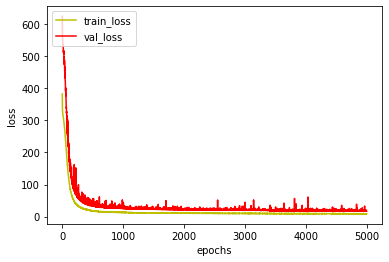

In [17]:
plt.plot(hist.history['loss'], 'y', label='train_loss')
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

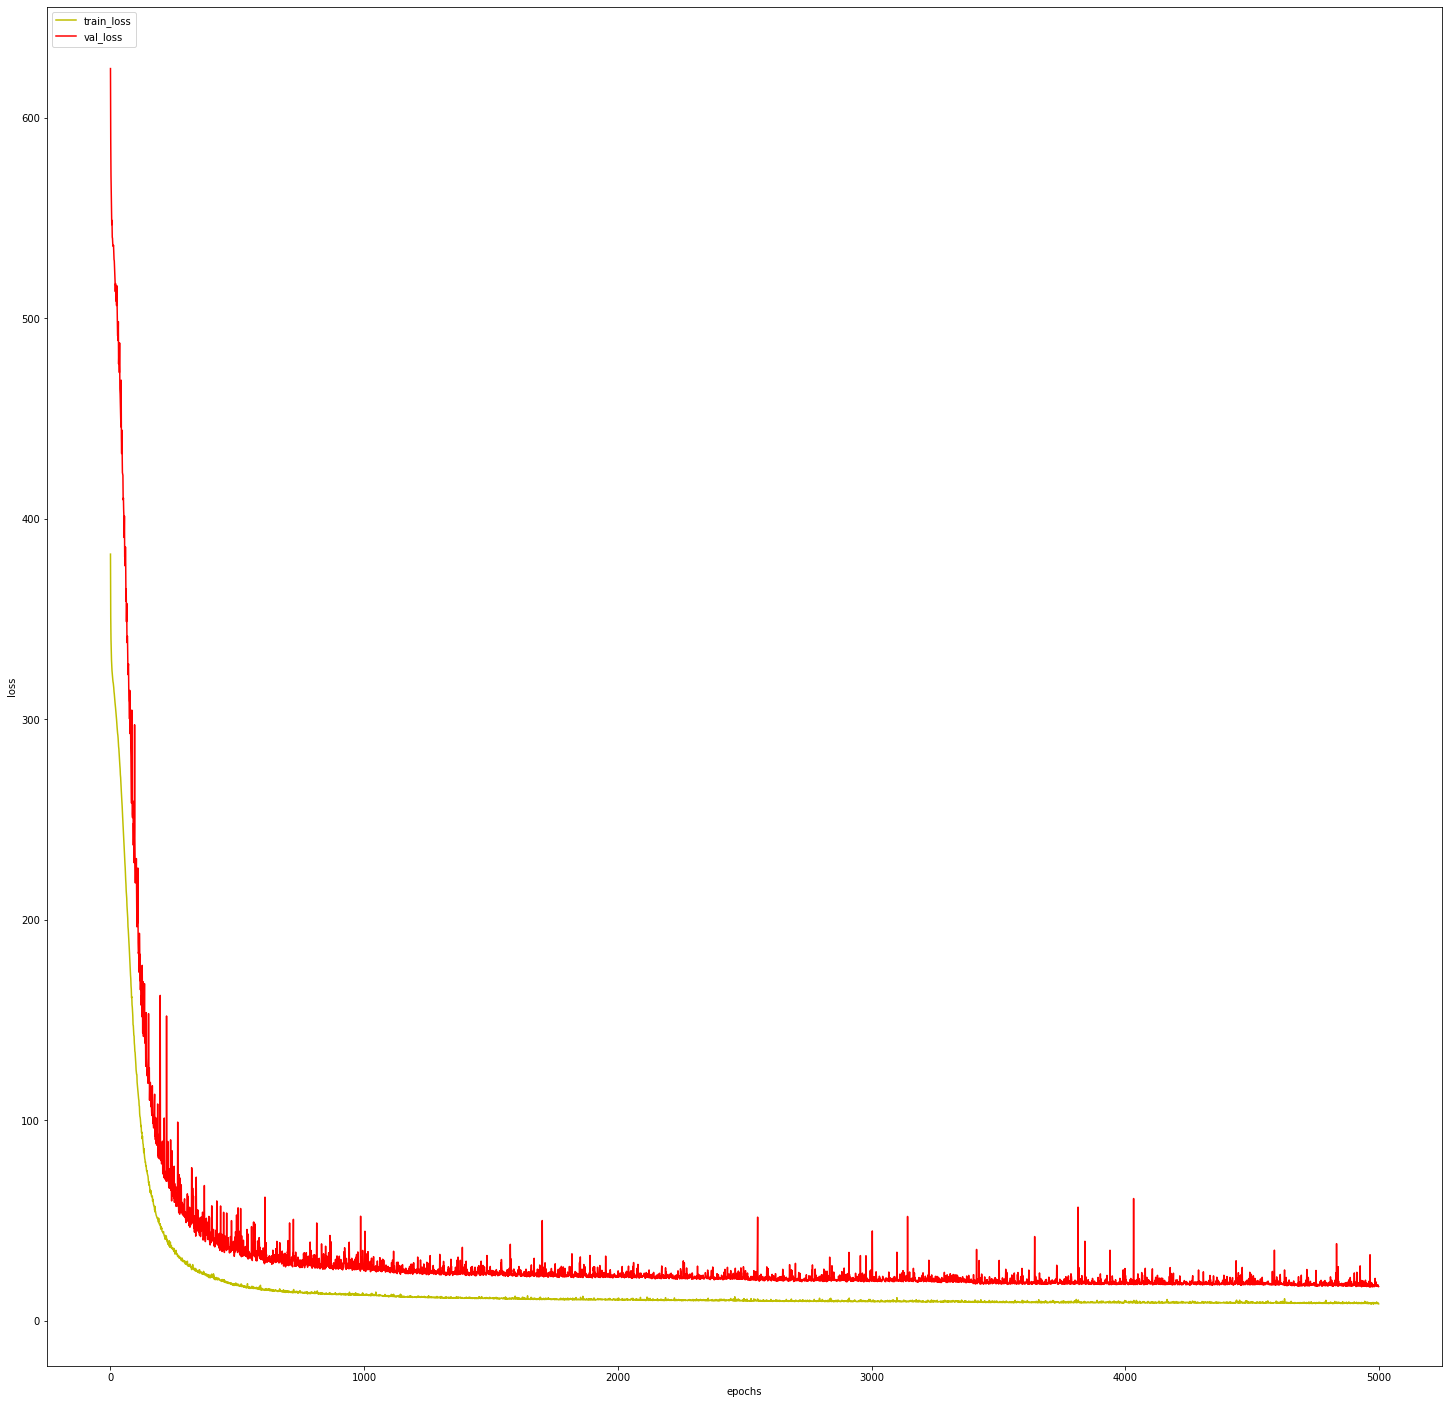

In [32]:
plt.plot(hist.history['loss'], 'y', label='train_loss')
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [25, 25] # [width, height] (inches)
plt.show()


In [65]:
loss, mae = model.evaluate(X_test, Y_test)
print(loss, mae)

4380/4380 [==============================] - 0s 105us/step
56.767631231418484 1.5243370532989502


In [66]:
model.load_weights('./best_model_20000_80_RMSProp'+'.h5')

In [93]:
samples = [randint(0, len(X_test)-1) for _ in range(15)]
pred = model.predict([X_test[samples]])
pred = pred.reshape(-1)
real = Y_test[samples]
real = real.reshape(-1)

In [94]:
pred

array([0.       , 0.       , 0.       , 1.5317956, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       ], dtype=float32)

In [95]:
real

array([0.7, 0, 0, 2.3, 0.5, 0, 0, 0, 0, 3.3, 0, 0, 0.7, 0, 0],
      dtype=object)

In [24]:
X2 = X[:, :, [1, 3, 4]]
pred2 = model.predict([X2[21960:21991,:,:]]) # +17~+16


In [25]:
print(pred2)

[]


In [26]:
np.shape(pred2)

(0,)

In [27]:
np.shape(X2)

(21900, 15, 3)

In [28]:
[X2[21890:-1,:,:]]

[array([[[12, -2.4, 0.1],
         [12, -0.9, 0],
         [12, 3.2, 0],
         [12, 8.1, 1.7],
         [12, 6.3, 0.2],
         [12, -0.7, 0],
         [12, 2.1, 1],
         [12, 2.7, 0],
         [12, 5.3, 0],
         [12, 7.8, 0],
         [12, 7.7, 9.8],
         [12, 0.8, 0],
         [12, -0.8, 0],
         [12, -1.1, 0],
         [12, -1.2, 0.6]],
 
        [[12, -0.9, 0],
         [12, 3.2, 0],
         [12, 8.1, 1.7],
         [12, 6.3, 0.2],
         [12, -0.7, 0],
         [12, 2.1, 1],
         [12, 2.7, 0],
         [12, 5.3, 0],
         [12, 7.8, 0],
         [12, 7.7, 9.8],
         [12, 0.8, 0],
         [12, -0.8, 0],
         [12, -1.1, 0],
         [12, -1.2, 0.6],
         [12, 4.1, 0.3]],
 
        [[12, 3.2, 0],
         [12, 8.1, 1.7],
         [12, 6.3, 0.2],
         [12, -0.7, 0],
         [12, 2.1, 1],
         [12, 2.7, 0],
         [12, 5.3, 0],
         [12, 7.8, 0],
         [12, 7.7, 9.8],
         [12, 0.8, 0],
         [12, -0.8, 0],
         [12

In [29]:
np.shape(X2)

(21900, 15, 3)

In [30]:
X2[21906]

IndexError: index 21906 is out of bounds for axis 0 with size 21900

In [ ]:
X2 = X[:, :, [1, 3, 4]]

In [ ]:
X3=[X2[21906]]

In [ ]:
X3

In [ ]:
np.shape([X3])

In [ ]:
X3=X2[21890:21909,:,:]

In [ ]:
pred = model.predict([X3])
pred = pred.reshape(-1)
pred

In [91]:
pred

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      , 52.576645,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ], dtype=float32)

In [92]:
real

array([0, 0, 4.2, 0, 2.3, 0, 0, 0, 50.7, 0, 0, 0, 0, 0, 2], dtype=object)

In [ ]:
pred[:]

In [ ]:
np.shape(pred)

In [ ]:
pred[21850:]

In [ ]:
np.shape(X2)

In [ ]:
X3